# CMS Data Clustering

In this notebook, we will be performing EDA and clustering on the Electron Region data.

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from functools import reduce

%matplotlib inline

In [2]:
# Hiding warnings
import warnings
warnings.filterwarnings('ignore')

### Importing the data

We are using the Electron Region data.

In [3]:
data = pd.read_csv("output_data/ElectronRegionData.csv") # Electron Region

In [4]:
# View the merged data head
data.head()

,event,eta,phi,et,position,electron,tau
0,0,0,0,12.15180,9,0,0
1,0,0,1,10.19040,5,0,0
2,0,0,2,7.06514,6,0,0
3,0,0,3,6.87023,14,0,0
4,0,0,4,5.66144,1,0,0


**Data Dictionary**

- event: Event number (Integer)
- eta: Index of eta coordinate 0-13 (Integer)
- phi: Index of phi coordinate, 0-17, which is also specifies the optical link (Integer)
- et: Transverse energy deposited in the region (Float)
- position: Position of the cluster within the region, a 4-bit number (Integer)
- electron: Electron bit signifying that the region likely has an electron or photon deposit (Bool)
- tau: Tau bit signifying that the region likely has a tau deposit (Bool)

In [5]:
# Check the shape of the merged dataframe
data.shape

(64512, 7)

Check for null values.

In [6]:
data.isnull().sum()

event       0
eta         0
phi         0
et          0
position    0
electron    0
tau         0
dtype: int64

There are no null values in the data.

### Exploratory Data Analysis (EDA)

We are performing EDA on the mock data for CMS Experiment.

Plotting the et values for each dataset (each region).

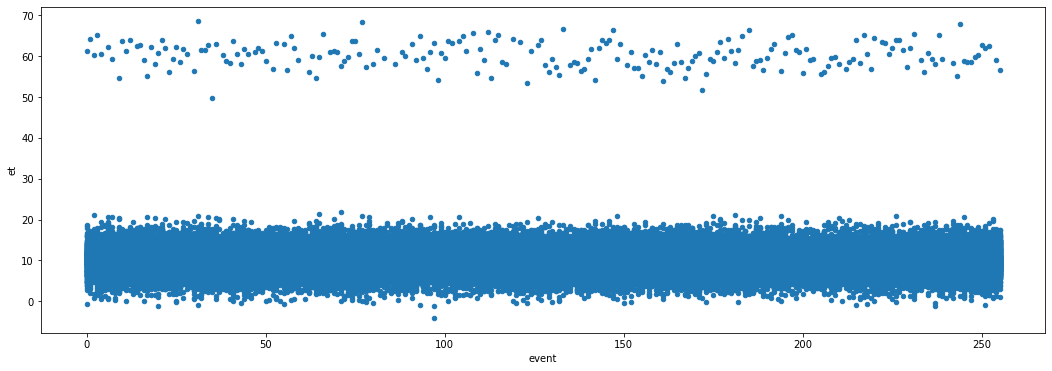

In [7]:
# Electron region data
data.plot.scatter(x='event', y = 'et', figsize = (18,6))

We can see that the dataset has segmented values of 'et' with most values segmented in lower bottom when plotted visually.

---

### Principal Component Analysis (PCA)

Before performing PCA, the data needs to be scaled.

In [8]:
# Numerical features
numerical_feats = ['eta', 'phi', 'et', 'position', 'electron', 'tau']

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# We are taking data for first event in our dataframe
df = data[numerical_feats]

# Fitting the standard scaler to our data
df = StandardScaler().fit_transform(df)

# Converting the scaled data into a dataframe
df_scaled = pd.DataFrame(df)

In [10]:
# Initializing PCA
pca = PCA()

In [12]:
# Fitting the model to the data
principalComponents = pca.fit_transform(df_scaled)

In [13]:
# Getting the data as a dataframe
principalDf = pd.DataFrame(data = principalComponents)

# View the first five rows of dataframe
principalDf.head()

,0,1,2,3,4,5
0,0.045253,-2.015051,-0.422288,-0.443857,1.203062,0.454903
1,-0.215134,-1.564636,-0.327272,-1.179590,1.267241,0.144277
2,-0.764863,-1.531249,-0.152755,-1.033743,1.133083,-0.362880
3,-0.957660,-2.130967,0.132709,0.414094,0.767653,-0.381042
4,-0.921559,-0.915396,0.084728,-1.928436,1.175181,-0.562865


### Feature relationships

Plotting the data distribution between different experiment data for the event 0.

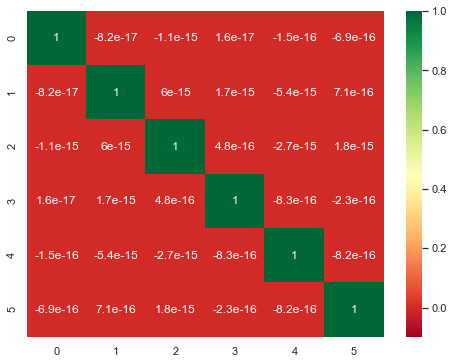

In [14]:
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.heatmap(principalDf.corr(method='pearson'), vmin=-.1, vmax=1,  annot=True, cmap='RdYlGn')
plt.show()

In [15]:
principalDf.shape

(64512, 6)

## Model building 


### K-Means Clustering

We will now apply K-Means Clustering to the dataframe that we generated using PCA.

In [16]:
from sklearn.cluster import KMeans

#### For 2 clusters

In [17]:
# Initializing the model
kmean = KMeans(n_clusters=2)

In [18]:
# FItting the model to the data
kmean.fit(principalDf)

KMeans(n_clusters=2)

Print the value of centroids.

In [19]:
centroids = kmean.cluster_centers_
print(centroids)

[[-0.26658475  0.0076558  -0.03757957 -0.016055    0.00914235  0.21409598]
 [ 2.27222769 -0.06525401  0.32030839  0.13684436 -0.0779246  -1.82484111]]


Predict and cluster the data into two label groups (0, 1).

In [20]:
principalDf['Label'] = kmean.predict(principalDf)

Plotting the value counts of our predicted labels.

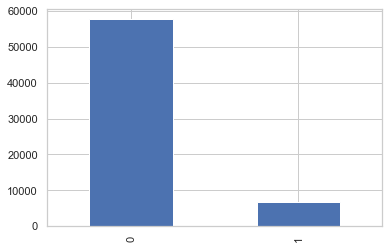

In [21]:
principalDf['Label'].value_counts().plot(kind = 'bar');

**Plotting the data clusters based on the predicted labels.**

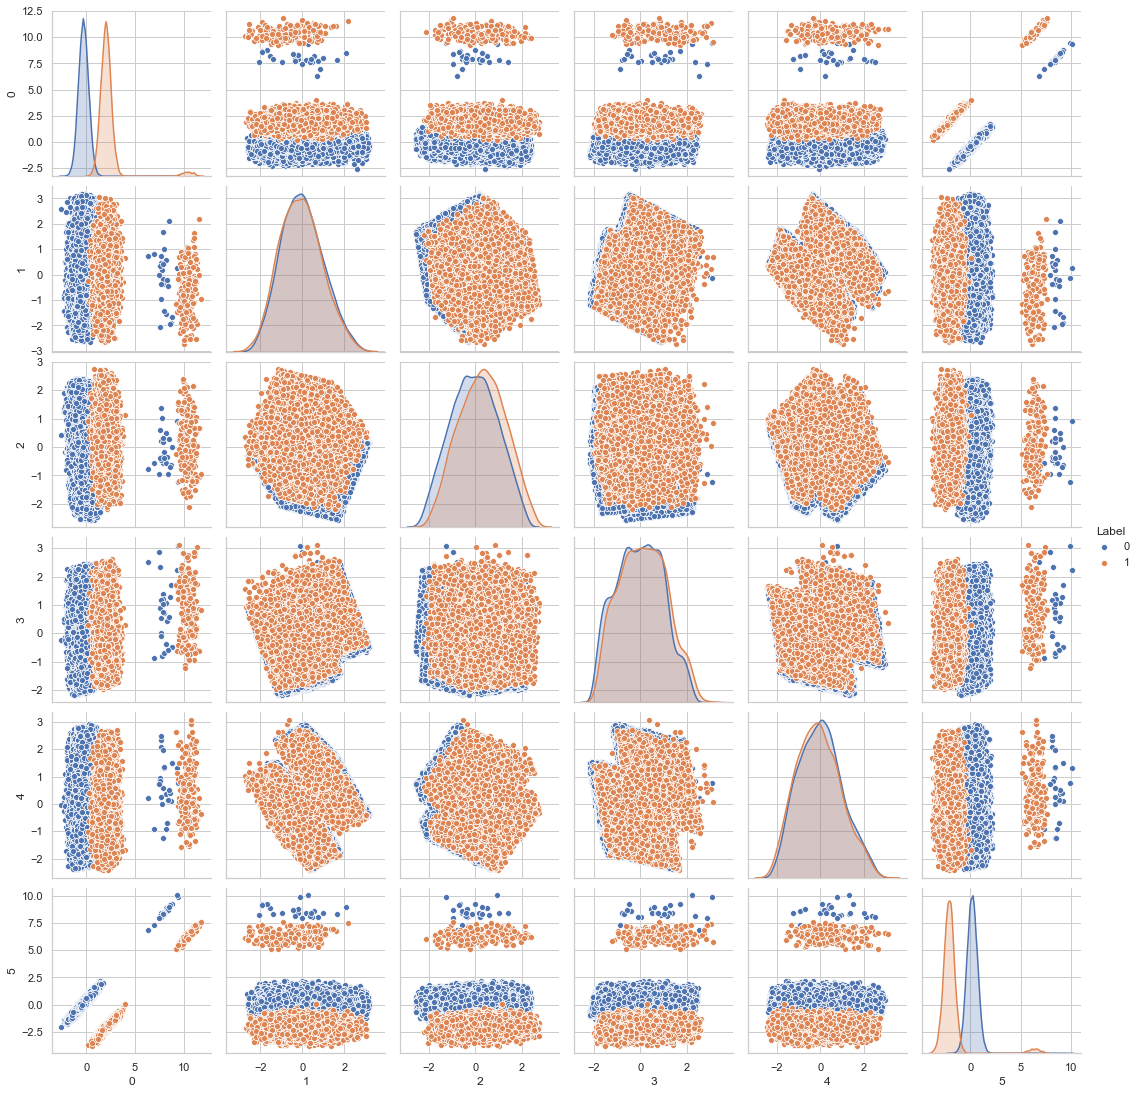

In [22]:
sns.pairplot(principalDf, hue='Label')

Here, we can see how the data is being clustered into two groups based on different feature columns using **K-Means Clustering.**

- Next step: Work on preprocessing and validation of models.